In [959]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [960]:
df = pd.read_excel("datos_idm.xlsx")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   empresa          1132 non-null   object        
 1   requisitor       985 non-null    object        
 2   po               1115 non-null   object        
 3   fecha_de_po      863 non-null    datetime64[ns]
 4   num_cot          996 non-null    object        
 5   cantidad         1125 non-null   float64       
 6   descripción      1133 non-null   object        
 7   p_unit_dll       722 non-null    float64       
 8   p_unit_pesos     408 non-null    float64       
 9   sub_total_dll    896 non-null    float64       
 10  sub_total_pesos  1460 non-null   float64       
 11  total_iva_dll    227 non-null    float64       
 12  total_iva_pesos  187 non-null    float64       
 13  status           718 non-null    object        
 14  status2          658 non-null    object 

In [961]:
df.isnull().sum()

empresa             568
requisitor          715
po                  585
fecha_de_po         837
num_cot             704
cantidad            575
descripción         567
p_unit_dll          978
p_unit_pesos       1292
sub_total_dll       804
sub_total_pesos     240
total_iva_dll      1473
total_iva_pesos    1513
status              982
status2            1042
dtype: int64

In [962]:
df.dropna(subset=['empresa'])

,empresa,requisitor,po,fecha_de_po,num_cot,cantidad,descripción,p_unit_dll,p_unit_pesos,sub_total_dll,sub_total_pesos,total_iva_dll,total_iva_pesos,status,status2
0,Logical USD,Ubaldo Calderón,L112024-1,2024-01-03,3980,1.0,Componentes CAF,7820.0,NaN,7820.0,NaN,8445.6,NaN,NaN,NaN
1,Logical USD,Ubaldo Calderón,L010424-2,2024-01-04,3989,3.0,Plunger Dib. L2348-110-T031,55.0,NaN,165.0,NaN,178.2,NaN,NaN,NaN
2,Medtronic,Luis Fernando,4200965110,2023-12-13,3975,3.0,0.0195 Necking TS130129,NaN,4580.0,NaN,13740.0,NaN,14839.2,NaN,NaN
3,Medtronic,Luis Fernando,4200961946,2023-12-06,3974,3.0,Tip Attach tubing Flaring TS114580,NaN,1950.0,NaN,5850.0,NaN,6318.0,NaN,NaN
4,Medtronic,Luis Fernando,4200961946,2023-12-06,3974,1.0,Tip Cut VBLOCK,NaN,4500.0,NaN,4500.0,NaN,4860.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Medtronic,Daniel Noe Vega,4200961321,2023-12-06,3969,1.0,Clamp Adapter,NaN,950.0,0.0,950.0,NaN,NaN,VENCIDA,NaN
1130,BOURNS,Bianca Jimenez,4501165597,2023-12-19,3957,1.0,Formador 3862 M-3862-001,360.0,NaN,360.0,0.0,NaN,NaN,VENCIDA,NaN
1131,Medtronic,Luis Fernando Gonzalez,4200965110,2023-12-13,3975,3.0,Fab. De 0.0195 Necking Die #TS130129,NaN,4580.0,0.0,13740.0,NaN,NaN,VENCIDA,NaN
1132,BOURNS,Carlos Zambrano,4501169173,2023-12-22,3979,2.0,Fab. De Sprue Bushing para Maq. De,290.0,NaN,580.0,0.0,NaN,NaN,VENCIDA,NaN


In [963]:
df["fecha_de_po"] = pd.to_datetime(df["fecha_de_po"]).dt.normalize()
print(df.dtypes)

empresa                    object
requisitor                 object
po                         object
fecha_de_po        datetime64[ns]
num_cot                    object
cantidad                  float64
descripción                object
p_unit_dll                float64
p_unit_pesos              float64
sub_total_dll             float64
sub_total_pesos           float64
total_iva_dll             float64
total_iva_pesos           float64
status                     object
status2                    object
dtype: object


In [964]:
df.sample()

,empresa,requisitor,po,fecha_de_po,num_cot,cantidad,descripción,p_unit_dll,p_unit_pesos,sub_total_dll,sub_total_pesos,total_iva_dll,total_iva_pesos,status,status2
611,SIA INNOVATION,JUAN TOVAR,3262,2021-09-27,3262,1.0,Fab. De Manual Expander de 0.23 a 0.25,NaN,4200.0,NaN,4200.0,NaN,NaN,VENCIDA,VENCIDA


In [965]:
df['day'] = df['fecha_de_po'].dt.day
df['week'] = df['fecha_de_po'].dt.isocalendar().week
df['month'] = df['fecha_de_po'].dt.month
df['year'] = df['fecha_de_po'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   empresa          1132 non-null   object        
 1   requisitor       985 non-null    object        
 2   po               1115 non-null   object        
 3   fecha_de_po      863 non-null    datetime64[ns]
 4   num_cot          996 non-null    object        
 5   cantidad         1125 non-null   float64       
 6   descripción      1133 non-null   object        
 7   p_unit_dll       722 non-null    float64       
 8   p_unit_pesos     408 non-null    float64       
 9   sub_total_dll    896 non-null    float64       
 10  sub_total_pesos  1460 non-null   float64       
 11  total_iva_dll    227 non-null    float64       
 12  total_iva_pesos  187 non-null    float64       
 13  status           718 non-null    object        
 14  status2          658 non-null    object 

In [966]:
print(df.describe())

                         fecha_de_po     cantidad    p_unit_dll  p_unit_pesos  \
count                            863  1125.000000    722.000000    408.000000   
mean   2023-06-09 10:00:41.714947840     4.505778    431.315789   5901.267623   
min              2021-01-12 00:00:00     0.000000      0.000000      0.000000   
25%              2022-10-04 00:00:00     1.000000     59.000000   1800.000000   
50%              2023-11-10 00:00:00     1.000000    185.000000   3400.000000   
75%              2024-06-25 00:00:00     4.000000    360.000000   5275.000000   
max              2024-12-20 00:00:00   300.000000  22100.000000  76600.000000   
std                              NaN    15.493404   1233.648562   8603.507869   

       sub_total_dll  sub_total_pesos  total_iva_dll  total_iva_pesos  \
count   8.960000e+02     1.460000e+03     227.000000       187.000000   
mean    2.201521e+04     4.736868e+03     761.439441     11236.966845   
min     0.000000e+00     0.000000e+00       0.00000

In [967]:
columnas = ['p_unit_dll', 'sub_total_dll', 'total_iva_dll', 'p_unit_pesos', 'sub_total_pesos', 'total_iva_pesos']

df.loc[:, columnas] = df[columnas].fillna(0)

In [968]:
df.isna().sum()

empresa             568
requisitor          715
po                  585
fecha_de_po         837
num_cot             704
cantidad            575
descripción         567
p_unit_dll            0
p_unit_pesos          0
sub_total_dll         0
sub_total_pesos       0
total_iva_dll         0
total_iva_pesos       0
status              982
status2            1042
day                 837
week                837
month               837
year                837
dtype: int64

In [969]:
df.describe()

,fecha_de_po,cantidad,p_unit_dll,p_unit_pesos,sub_total_dll,sub_total_pesos,total_iva_dll,total_iva_pesos,day,week,month,year
count,863,1125.000000,1700.000000,1700.000000,1.700000e+03,1.700000e+03,1700.000000,1700.000000,863.000000,863.0,863.000000,863.000000
mean,2023-06-09 10:00:41.714947840,4.505778,183.182353,1416.304229,1.160331e+04,4.068134e+03,101.674561,1236.066353,16.501738,27.164542,6.622248,2022.926999
min,2021-01-12 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.000000,2021.000000
25%,2022-10-04 00:00:00,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,8.000000,16.5,4.000000,2022.000000
50%,2023-11-10 00:00:00,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,18.000000,26.0,6.000000,2023.000000
75%,2024-06-25 00:00:00,4.000000,140.000000,0.000000,2.700000e+02,0.000000e+00,0.000000,0.000000,24.000000,39.0,9.000000,2024.000000
max,2024-12-20 00:00:00,300.000000,22100.000000,76600.000000,1.057585e+07,2.485084e+06,15876.000000,61830.000000,31.000000,51.0,12.000000,2024.000000
std,NaN,15.493404,831.456681,4907.910334,3.230293e+05,6.068655e+04,610.673462,5204.356091,8.892484,13.583062,3.125535,1.208247


In [970]:
df_2021 = df[df['year'] == 2021]
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 416 to 653
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   empresa          195 non-null    object        
 1   requisitor       143 non-null    object        
 2   po               192 non-null    object        
 3   fecha_de_po      195 non-null    datetime64[ns]
 4   num_cot          121 non-null    object        
 5   cantidad         194 non-null    float64       
 6   descripción      195 non-null    object        
 7   p_unit_dll       195 non-null    float64       
 8   p_unit_pesos     195 non-null    float64       
 9   sub_total_dll    195 non-null    float64       
 10  sub_total_pesos  195 non-null    float64       
 11  total_iva_dll    195 non-null    float64       
 12  total_iva_pesos  195 non-null    float64       
 13  status           195 non-null    object        
 14  status2          194 non-null    object      

In [971]:
df_2022 = df[df['year'] == 2022]
df_2023 = df[df['year'] == 2023]
df_2024 = df[df['year'] == 2024]

In [972]:
df_per_month_2021 = df_2021.groupby(['month']).agg(
    total_ordenes=('descripción', 'count')   # Cuenta cuántas órdenes hubo
)
df_per_month_2021 = df_per_month_2021.sort_values(by="total_ordenes", ascending=False)

In [973]:
df_per_month_2021.describe()

,total_ordenes
count,11.000000
mean,17.727273
std,8.922902
min,1.000000
25%,15.500000
50%,18.000000
75%,19.000000
max,36.000000


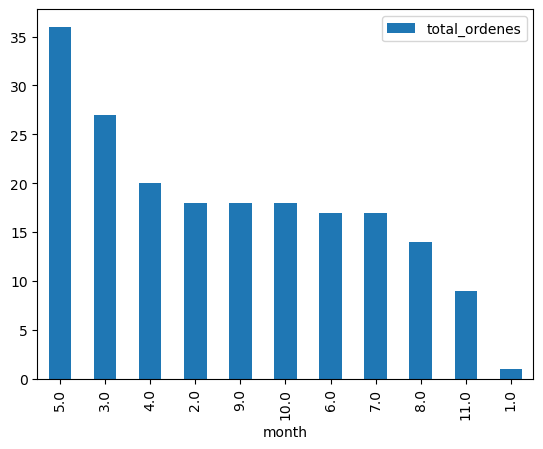

In [974]:
df_per_month_2021.plot(kind='bar') 
plt.show()

En 2021 los tres meses con mayor cantidad de proyectos fue Mayo, Marzo y Abril

In [976]:
df_per_month_2022 = df_2022.groupby(['month']).agg(
    total_ordenes=('descripción', 'count')   # Cuenta cuántas órdenes hubo
)
df_per_month_2023 = df_2023.groupby(['month']).agg(
    total_ordenes=('descripción', 'count')   # Cuenta cuántas órdenes hubo
)
df_per_month_2024 = df_2024.groupby(['month']).agg(
    total_ordenes=('descripción', 'count')   # Cuenta cuántas órdenes hubo
)
df_per_month_2022 = df_per_month_2022.sort_values(by="total_ordenes", ascending=False)
df_per_month_2023 = df_per_month_2023.sort_values(by="total_ordenes", ascending=False)
df_per_month_2024 = df_per_month_2024.sort_values(by="total_ordenes", ascending=False)

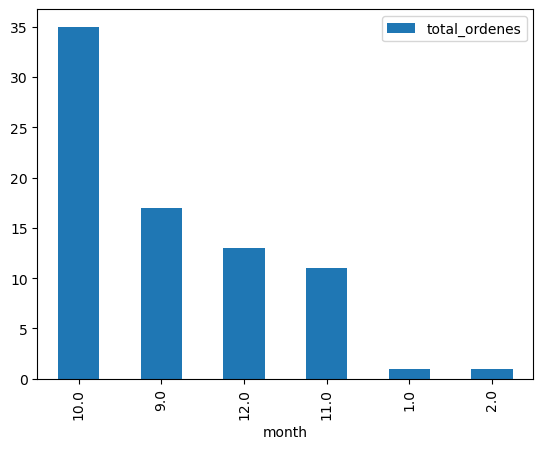

In [977]:
df_per_month_2022.plot(kind='bar') 
plt.show()

En el 2022 los tres meses con mayor cantidad de proyectos fueron Octubre, Septiembre y Diciembre

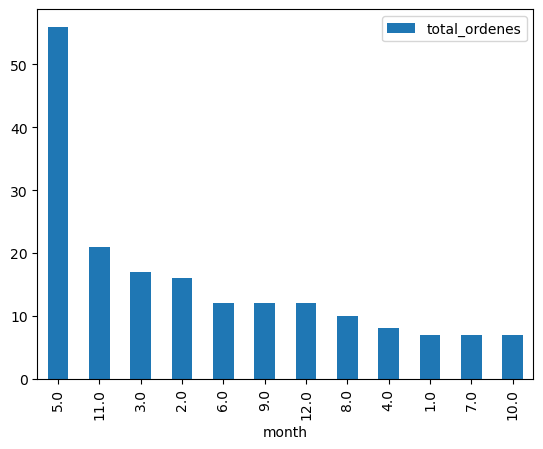

In [979]:
df_per_month_2023.plot(kind='bar') 
plt.show()

Los tres meses con mayor cantidad de proyectos del 2023 fueron Mayo, Noviembre y Marzo

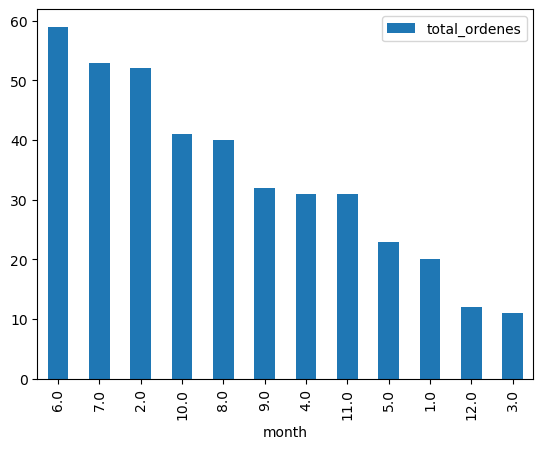

In [981]:
df_per_month_2024.plot(kind='bar') 
plt.show()

Los mayores con mayor numero de ordenes del 2024 fueron Junio, Julio y Febrero

In [983]:
df_mayor_produccion_2021 = df_2021[df_2021['month'].isin([3,4,5])]
df_mayor_produccion_2021.sample(5)

,empresa,requisitor,po,fecha_de_po,num_cot,cantidad,descripción,p_unit_dll,p_unit_pesos,sub_total_dll,sub_total_pesos,total_iva_dll,total_iva_pesos,status,status2,day,week,month,year
476,BOURNS,ISELA VILLANUEBA,4500952414,2021-04-14,3049,1.0,Vacuum tip 3310,290.0,0.0,290.0,0.0,0.0,0.0,EN PROCESO,ENTREGADO,14.0,15,4.0,2021.0
509,MEDTRONIC,NaN,4200416132,2021-05-19,NaN,3.0,DADO PARA NECKING,0.0,3200.0,0.0,9600.0,0.0,0.0,EN PROCESO,ENTREGADO,19.0,20,5.0,2021.0
498,MEDTRONIC,Raul Gaeta,4200409032,2021-05-07,NaN,NaN,Fixtura contenedor base para cortinas,0.0,5800.0,0.0,5800.0,0.0,0.0,EN PROCESO,ENTREGADO,7.0,18,5.0,2021.0
454,BOURNS,JUAN LUIS HERNANDEZ,4500949430,2021-03-29,3021,1.0,Ajuste de Cuña para slinder,290.0,0.0,290.0,0.0,0.0,0.0,EN PROCESO,ENTREGADO,29.0,13,3.0,2021.0
515,BOURNS,ISELA VILLANUEBA,4500959391,2021-05-24,NaN,20.0,4RO2166 fabRICACION DE ELECTRODOS,20.0,0.0,400.0,0.0,0.0,0.0,EN PROCESO,ENTREGADO,24.0,21,5.0,2021.0


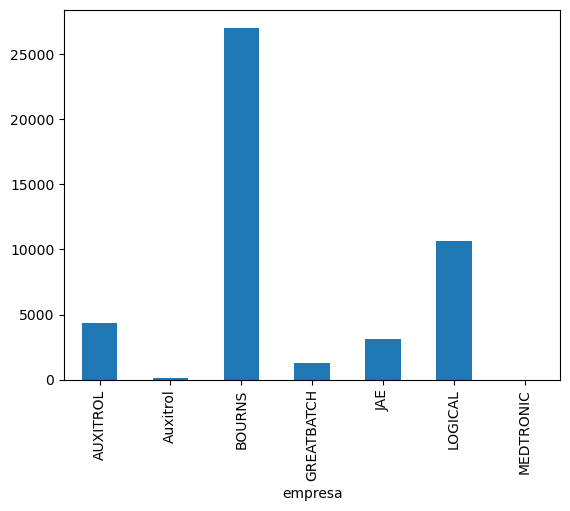

In [984]:
df_grouped = df_mayor_produccion_2021.groupby('empresa')['sub_total_dll'].sum()
df_grouped.plot(kind = 'bar')
plt.show()

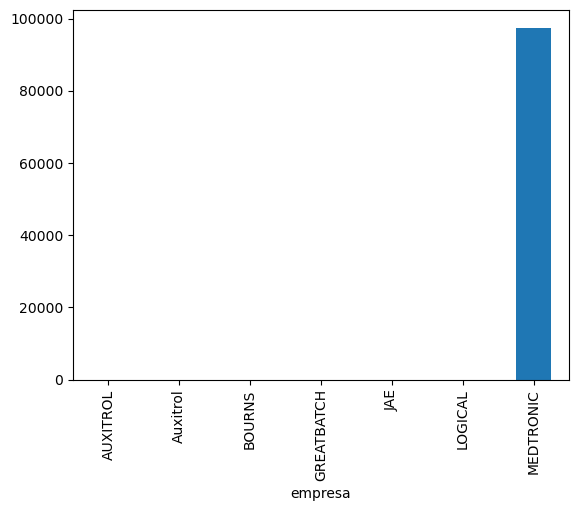

In [985]:
df_grouped_pesos = df_mayor_produccion_2021.groupby('empresa')['sub_total_pesos'].sum()
df_grouped_pesos.plot(kind = 'bar')
plt.show()

In [986]:
conteo_empresas = df_mayor_produccion_2021['empresa'].value_counts()
print(conteo_empresas)

empresa
BOURNS        48
AUXITROL      15
MEDTRONIC     10
LOGICAL        5
JAE            2
Auxitrol       2
GREATBATCH     1
Name: count, dtype: int64


In [987]:
df_filtrado = df_mayor_produccion_2021[df_mayor_produccion_2021['empresa'].isin(['AUXITROL', 'BOURNS', 'MEDTRONIC'])]
df_grouped_kind = df_filtrado.groupby(['empresa', 'descripción'])['sub_total_dll'].sum().reset_index()

In [988]:
df_grouped_kind.count()

empresa          71
descripción      71
sub_total_dll    71
dtype: int64

In [989]:
df_grouped_kind = df_grouped_kind.sort_values(by='sub_total_dll', ascending=False)

In [990]:
df_grouped_kind.head(10)

,empresa,descripción,sub_total_dll
21,BOURNS,Diseño y fab. De Dado de corte para bushing Mo...,9500.0
54,BOURNS,REPARACION Y AJUSTE DE FORMADORA,1750.0
23,BOURNS,Diseño y fabricacion de dispensador mltiple,1650.0
25,BOURNS,Dseño Fab de nido de asperizado,880.0
6,AUXITROL,T17741 MODIF A FIXT T17741 PARA SOLDAR EN FIRE,858.0
22,BOURNS,Diseño y fab. De fixtura soldar,795.0
47,BOURNS,Insert mod 8000,780.0
32,BOURNS,"FAB, DE RACA PARA 10 PZAS",760.0
52,BOURNS,Pin Crimp-cut ...,720.0
46,BOURNS,Fixtura para soldado de PCB y terminal,560.0


In [991]:
df_filtrado1 = df_mayor_produccion_2021[df_mayor_produccion_2021['empresa'].isin(['AUXITROL', 'BOURNS', 'MEDTRONIC'])]
df_grouped_kind_pesos = df_filtrado1.groupby(['empresa', 'descripción'])['sub_total_pesos'].sum().reset_index()
df_grouped_kind_pesos = df_grouped_kind_pesos.sort_values(by='sub_total_pesos', ascending=False)

In [992]:
df_grouped_kind_pesos.head(10)

,empresa,descripción,sub_total_pesos
67,MEDTRONIC,Fab. Y ensmble de Fixtura,30500.0
64,MEDTRONIC,FIXTURA PARA CURADO DE HUB,17800.0
63,MEDTRONIC,FAB DE NECK EYELET ANILLO DE ACUELLADO,15840.0
61,MEDTRONIC,DADO PARA NECKING,9600.0
66,MEDTRONIC,"Fab. De dado torrington, fabricado CPM ...",8400.0
68,MEDTRONIC,Fixtura contenedor base para cortinas,5800.0
65,MEDTRONIC,FIXTURA POCAYOQUE ELEMENTO,4750.0
69,MEDTRONIC,Retrabajo D fixtura duck bill,2200.0
70,MEDTRONIC,Servicio de Retrabajo de DADO de Acuellado,1560.0
62,MEDTRONIC,Expeditado Servicio de Retrabajo de DADO de ...,1100.0


2024

In [994]:
df_mayor_produccion_2024 = df_2024[df_2024['month'].isin([6,7,2])]
df_mayor_produccion_2024.sample(5)

,empresa,requisitor,po,fecha_de_po,num_cot,cantidad,descripción,p_unit_dll,p_unit_pesos,sub_total_dll,sub_total_pesos,total_iva_dll,total_iva_pesos,status,status2,day,week,month,year
33,Logical USD,Jorge Calderón,L013124-0,2024-02-01,4004,1.0,fixtura L2348-110-T107,60.0,0.0,60.0,0.0,64.80,0.0,NaN,NaN,1.0,5,2.0,2024.0
200,Logical USD,Ubaldo Calderón,LO062424-2IDM,2024-06-25,4160,1.0,T3029743,44.0,0.0,44.0,0.0,47.52,0.0,NaN,NaN,25.0,26,6.0,2024.0
248,Medtronic,Nelson Ortiz,4201097750,2024-07-23,4206,1.0,"Backgroun Fixture, Ballon bond #D084563-XX",0.0,2950.0,0.0,2950.0,0.00,3186.0,NaN,NaN,23.0,30,7.0,2024.0
41,Logical USD,Diego Ubaldo,L020924-1,2024-02-09,4009,1.0,Buje #LD-TP-101-T026,78.0,0.0,78.0,0.0,84.24,0.0,NaN,NaN,9.0,6,2.0,2024.0
179,Logical USD,Ubaldo Calderón,LO062424-2IDM,2024-06-25,4160,1.0,T2679899,48.0,0.0,48.0,0.0,51.84,0.0,NaN,NaN,25.0,26,6.0,2024.0


In [995]:
conteo_empresas_2024 = df_mayor_produccion_2024['empresa'].value_counts()
print(conteo_empresas_2024)

empresa
Logical USD      70
Medtronic        34
Greatbatch       30
Bourns           17
Caliente          6
Benchmark         5
Kenerly Tecma     1
Auxitrol          1
Name: count, dtype: int64


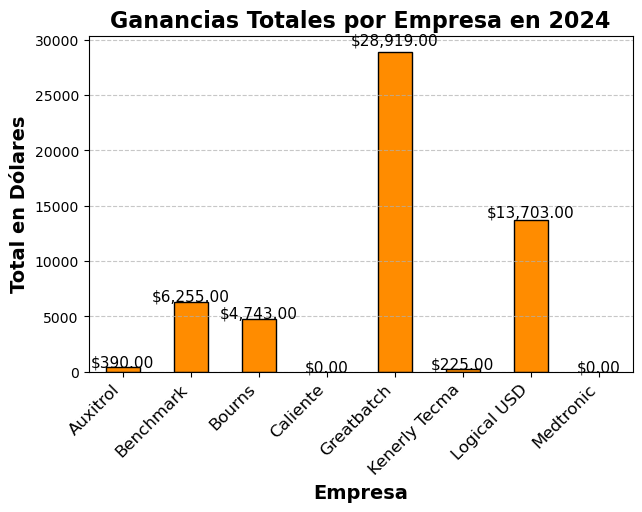

In [1063]:
df_grouped_2024 = df_mayor_produccion_2024.groupby('empresa')['sub_total_dll'].sum()
df_grouped_2024.plot(kind = 'bar', color = 'darkorange', edgecolor = 'black')
plt.title('Ganancias Totales por Empresa en 2024', fontsize=16, fontweight='bold')
plt.xlabel('Empresa', fontsize=14, fontweight='bold')
plt.ylabel('Total en Dólares', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(df_grouped_2024):
    plt.text(i, value + (value * 0.02), f'${value:,.2f}', ha='center', fontsize=11, fontweight='light')
    plt.subplots_adjust(bottom=0.2, left=0.1, right=0.95, top=0.9)

plt.show()

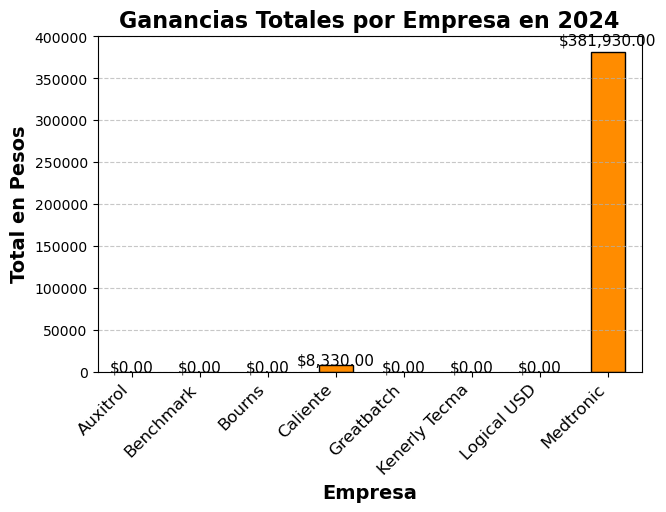

In [1069]:
df_grouped_pesos_2024 = df_mayor_produccion_2024.groupby('empresa')['sub_total_pesos'].sum()
df_grouped_pesos_2024.plot(kind = 'bar',color = 'darkorange', edgecolor = 'black')
plt.title('Ganancias Totales por Empresa en 2024', fontsize=16, fontweight='bold')
plt.xlabel('Empresa', fontsize=14, fontweight='bold')
plt.ylabel('Total en Pesos', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(df_grouped_pesos_2024):
    plt.text(i, value + (value * 0.02), f'${value:,.2f}', ha='center', fontsize=11, fontweight='light')
    plt.subplots_adjust(bottom=0.2, left=0.1, right=0.95, top=0.9)
plt.show()

In [998]:
df_filtrado_2024 = df_mayor_produccion_2024[df_mayor_produccion_2024['empresa'].isin(['Logical USD', 'Greatbatch', 'Medtronic', 'Caliente'])]
df_grouped_kind_2024 = df_filtrado_2024.groupby(['empresa', 'descripción'])['sub_total_dll'].sum().reset_index()

In [999]:
df_grouped_kind_2024 = df_grouped_kind_2024.sort_values(by='sub_total_dll', ascending=False)

In [1071]:
df_filtrado_2024 = df_mayor_produccion_2024[df_mayor_produccion_2024['empresa'].isin(['Logical USD', 'Greatbatch', 'Medtronic', 'Caliente'])]
df_grouped_kind_pesos_2024 = df_filtrado_2024.groupby(['empresa', 'descripción', 'po'])['sub_total_pesos'].sum().reset_index()
df_grouped_kind_pesos_2024 = df_grouped_kind_pesos_2024.sort_values(by='sub_total_pesos', ascending=False)

In [1073]:
df_grouped_kind_pesos_2024.head(10)

,empresa,descripción,po,sub_total_pesos
132,Medtronic,Sprnter Legend Necking Die TS123877,4201081571,46000.0
130,Medtronic,SPRINTER Necking TS113647,4201075297,45800.0
131,Medtronic,Sistema de Dispensado de navajas,4201094920,39600.0
126,Medtronic,Necking #TS130129,4201085081,36800.0
122,Medtronic,Inner Shaft flaring pin dib. T462753,4201080755,20400.0
129,Medtronic,Rampa de empaque,4201097656,18650.0
124,Medtronic,Necking #TS113647,4201085081,18400.0
125,Medtronic,Necking #TS123877,4201085081,18400.0
120,Medtronic,Fixtura de Sujeción de Válvula para limpieza d...,4201078502,17750.0
134,Medtronic,Tapa Diseñada para ser compatible en 2 modelos,4201094920,13900.0


In [1002]:
df_grouped_kind_2024.head(10)

,empresa,descripción,sub_total_dll
32,Greatbatch,Inserto Spangle Cap #19TM095E00,4000.0
4,Greatbatch,Core Pin Austin # 19TM09N800,2450.0
6,Greatbatch,Ensamble de Clamp nest #19TM056P00,2385.0
33,Greatbatch,Trim guide Dib #19TM054900-002,2050.0
5,Greatbatch,Ensamble de Clamp #19TM056P00-05,1965.0
12,Greatbatch,Blade Dib. 19TM05900-005,1950.0
21,Greatbatch,Ensamble de Clamp Nest #19TM056P00,1590.0
13,Greatbatch,Carrier Base Horizontal Dib. 19TM09J700-001,1450.0
18,Greatbatch,Ensamble Clamp HANDLE 19TM056P00,1310.0
16,Greatbatch,Componentes Fixt Ultra 19TM09H200,1280.0
